In [46]:
import pickle

from src.features.build_features import get_train_test
from src.models.find_model import check_model

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [47]:
df_path = "../data/processed/heart_processed"
X_train, X_test, y_train, y_test = get_train_test(df_path)

# Fine-tuning Random Forest Classifier

In [48]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [38]:
rf_cls = RandomForestClassifier(random_state=42, n_jobs=-1, bootstrap=True, oob_score=True)

rf_params = [
    {
    "max_depth" : [2,3,4],
    "min_samples_split" : [3,5,7], 
    "n_estimators" : [50, 100, 150],
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_features" : [0.1, 0.5, 1.0]
    }
]

rs_cls_gs = GridSearchCV(rf_cls, rf_params, cv=10, verbose=1, scoring="recall")

rs_cls_gs.fit(X_train_pca, y_train)
print(rs_cls_gs.best_params_)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.1, 'min_samples_split': 3, 'n_estimators': 150}


		 train	| test
precision	 0.81 	| 0.88
recall		 0.96 	| 0.94
f1-score	 0.88 	| 0.91
accuracy	 0.86 	| 0.9


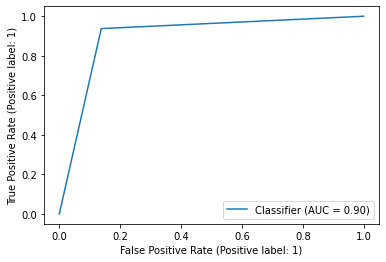

In [42]:
rf_cls = rs_cls_gs.best_estimator_
check_model(rf_cls, X_train_pca, X_test_pca, y_train, y_test, roc=True)

# save model
# with open("../models/random_forest.pkl", "wb") as file:
#     pickle.dump(rf_cls, file)

# Fine-tuning Gradient Boosting Classifier

In [59]:
gb_cls = GradientBoostingClassifier(random_state=42, loss="log_loss", criterion="friedman_mse")

gb_params = [
    {
    "n_estimators" : [50, 100, 150, 200], 
    "max_depth" : [2,3,4], 
    "min_samples_split" : [3, 5], 
    "max_features" : [0.1, 0.2],
    "learning_rate" : [0.01, 0.1]
    }
]

gb_cls_gs = GridSearchCV(gb_cls, gb_params, cv=10, verbose=1, scoring="recall")

gb_cls_gs.fit(X_train_pca, y_train)
print(gb_cls_gs.best_params_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 0.2, 'min_samples_split': 3, 'n_estimators': 50}


		 train	| test
precision	 0.89 	| 0.89
recall		 0.99 	| 0.97
f1-score	 0.94 	| 0.93
accuracy	 0.93 	| 0.92


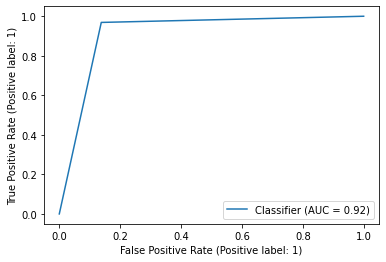

In [62]:
gb_cls = gb_cls_gs.best_estimator_
check_model(gb_cls, X_train_pca, X_test_pca, y_train, y_test, roc=True)

# save model
# with open("../models/gradient_boosting.pkl", "wb") as file:
#     pickle.dump(gb_cls, file)

# Fine-tuning SVM with poly and rbf kernel

In [44]:
svm_cls = SVC(random_state=42)

svm_params = [
    {
        "kernel" : ["poly", "rbf"],
        "C" : [0.01, 0.1, 0.2, 0.3, 0.4],
        "degree" : [2,3,4,5,6,7],
        "gamma" : ["auto", "scale"],
    }
]

svm_cls_gs = GridSearchCV(svm_cls, svm_params, cv=10, verbose=1, scoring="recall")

svm_cls_gs.fit(X_train, y_train)
print(svm_cls_gs.best_params_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
{'C': 0.01, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}


		 train	| test
precision	 0.64 	| 0.71
recall		 1.0 	| 0.94
f1-score	 0.78 	| 0.81
accuracy	 0.69 	| 0.77


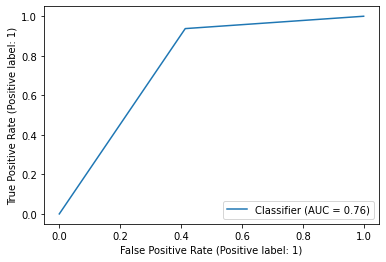

In [43]:
svm_cls = svm_cls_gs.best_estimator_
check_model(svm_cls, X_train, X_test, y_train, y_test, roc=True)